In [6]:
import torch
import matplotlib.pyplot as plt
import random

In [2]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

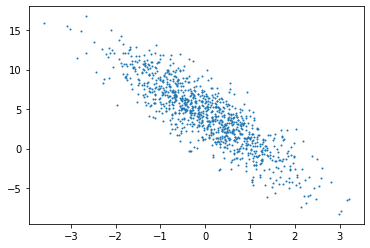

In [4]:
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [8]:
batch_size = 10
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [9]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [10]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [11]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [16]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            print(param.grad)
            param.grad.zero_()

In [17]:
lr = 0.03
num_epochs = 7
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

tensor([[ 0.0168],
        [-0.0260]])
tensor([0.0193])
tensor([[ 0.0358],
        [-0.0439]])
tensor([0.0346])
tensor([[ 0.0251],
        [-0.0301]])
tensor([0.0043])
tensor([[0.0558],
        [0.0024]])
tensor([0.0116])
tensor([[-0.0242],
        [-0.0080]])
tensor([-0.0271])
tensor([[0.0190],
        [0.0189]])
tensor([-0.0286])
tensor([[0.0085],
        [0.0013]])
tensor([-0.0256])
tensor([[0.0003],
        [0.0394]])
tensor([-0.0077])
tensor([[ 0.0453],
        [-0.0277]])
tensor([-0.0116])
tensor([[-0.0146],
        [ 0.0384]])
tensor([-0.0330])
tensor([[0.0243],
        [0.0387]])
tensor([0.0183])
tensor([[0.0102],
        [0.0039]])
tensor([0.0110])
tensor([[ 0.0132],
        [-0.0665]])
tensor([0.0320])
tensor([[ 0.0210],
        [-0.0231]])
tensor([0.0475])
tensor([[0.0539],
        [0.0117]])
tensor([-0.0314])
tensor([[-0.0215],
        [ 0.0197]])
tensor([0.0682])
tensor([[-0.0114],
        [ 0.0259]])
tensor([-0.0095])
tensor([[0.0646],
        [0.0266]])
tensor([-0.0707])